## Heart Attack Analysis and Predictive Models

### Necessary Imports

In [471]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
import xgboost as xgb

### About this dataset

Link to Data: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

### Read In Data

In [544]:
df_heart = pd.read_csv("heart_attacks.csv")
df_o2sat = pd.read_csv('o2Saturation.csv')
df = df_heart.copy()
df["O2Sat"] = df_o2sat.copy()
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,O2Sat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


### Display DataFrame Info

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
 14  O2Sat     303 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 35.6 KB


In [474]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,O2Sat
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,97.480858
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.346740
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.500000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,97.500000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,97.500000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,98.600000


### Data Cleaning

In [475]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
O2Sat       0
dtype: int64

In [476]:
df.duplicated().sum()

1

In [477]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

### Unique Values

In [478]:
#view unique values of each column
for column in df:
    print(f"{column} : {df[column].value_counts().shape[0]} unique values")
    print(sorted(df[column].unique()))
    print()

age : 41 unique values
[29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 76, 77]

sex : 2 unique values
[0, 1]

cp : 4 unique values
[0, 1, 2, 3]

trtbps : 49 unique values
[94, 100, 101, 102, 104, 105, 106, 108, 110, 112, 114, 115, 117, 118, 120, 122, 123, 124, 125, 126, 128, 129, 130, 132, 134, 135, 136, 138, 140, 142, 144, 145, 146, 148, 150, 152, 154, 155, 156, 160, 164, 165, 170, 172, 174, 178, 180, 192, 200]

chol : 152 unique values
[126, 131, 141, 149, 157, 160, 164, 166, 167, 168, 169, 172, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 192, 193, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 259, 260

### Outlier Detection

In [479]:
for i in numerical_list:
    # calculate IQR value
    Q1 = np.percentile(df.loc[:, i], 25)     # lower quartille
    Q3 = np.percentile(df.loc[:, i], 75)     # upper quartille
    IQR = Q3 - Q1

    print(f"Old shape: {df.loc[:, i].shape}")
    
    # upper bound
    upper = np.where(df.loc[:, i] >= (Q3 + (IQR * 2.5)))
    
    # lower bound
    lower = np.where(df.loc[:, i] <= (Q1 - (IQR * 2.5)))
    
    print(f"{i} --> {lower} - {upper}")
    
    # drop upper outliers
    try:
        df.drop(upper[0], inplace = True)
    except:
        print(f"KeyError: {upper[0]} not found in axis")
        
    # drop lower outliers
    try:
        df.drop(lower[0], inplace = True)
    except:
        print(f"KeyError: {lower[0]} not found in axis")

    print(f"New shape: {df.shape}")

Old shape: (302,)
age --> (array([], dtype=int64),) - (array([], dtype=int64),)
New shape: (302, 15)
Old shape: (302,)
trtbps --> (array([], dtype=int64),) - (array([222, 247], dtype=int64),)
New shape: (300, 15)
Old shape: (300,)
chol --> (array([], dtype=int64),) - (array([85], dtype=int64),)
New shape: (299, 15)
Old shape: (299,)
thalachh --> (array([], dtype=int64),) - (array([], dtype=int64),)
New shape: (299, 15)
Old shape: (299,)
oldpeak --> (array([], dtype=int64),) - (array([202, 219], dtype=int64),)
New shape: (297, 15)
Old shape: (297,)
output --> (array([], dtype=int64),) - (array([], dtype=int64),)
New shape: (297, 15)


### Correlation Matrix

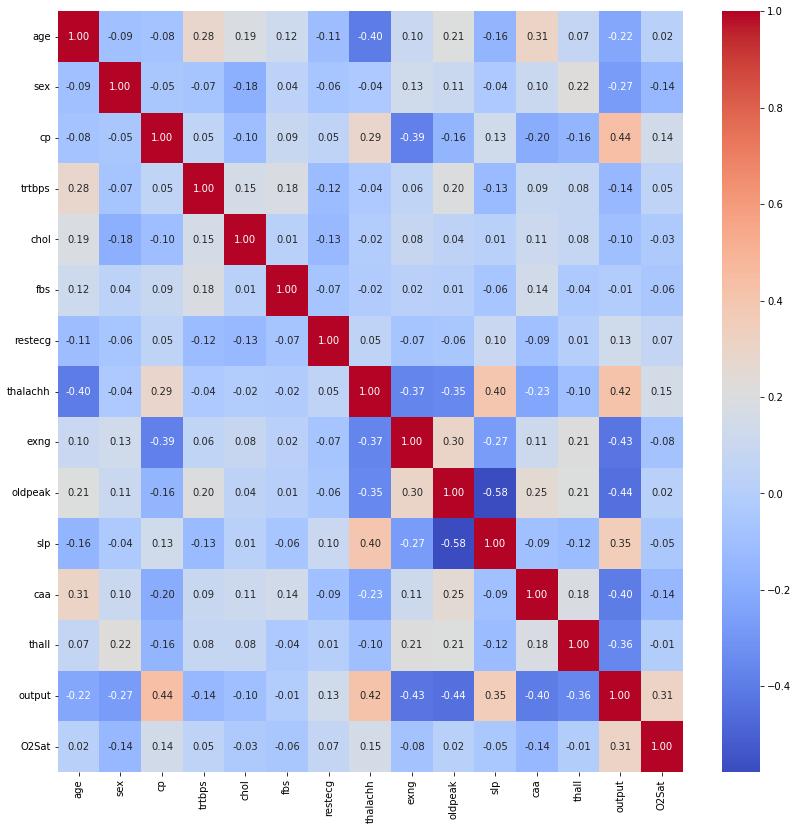

In [480]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.gcf().set_size_inches(14, 14)

### Output Counts

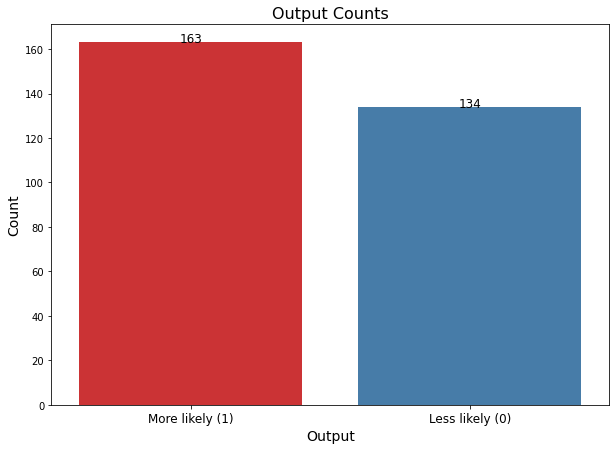

In [481]:
order = df['output'].value_counts().index[::1]

ax = sns.countplot(x='output', data=df, order=order, palette='Set1')
ax.set_xticklabels(['More likely (1)', 'Less likely (0)'], fontsize=12)

counts = df['output'].value_counts()
for i, count in enumerate(counts):
    plt.annotate(count, xy=(i, count), ha='center', fontsize=12)

plt.title('Output Counts', fontsize=16)
plt.xlabel('Output', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.gcf().set_size_inches(10, 7)
plt.show()

### Outcome Based Age Distribution

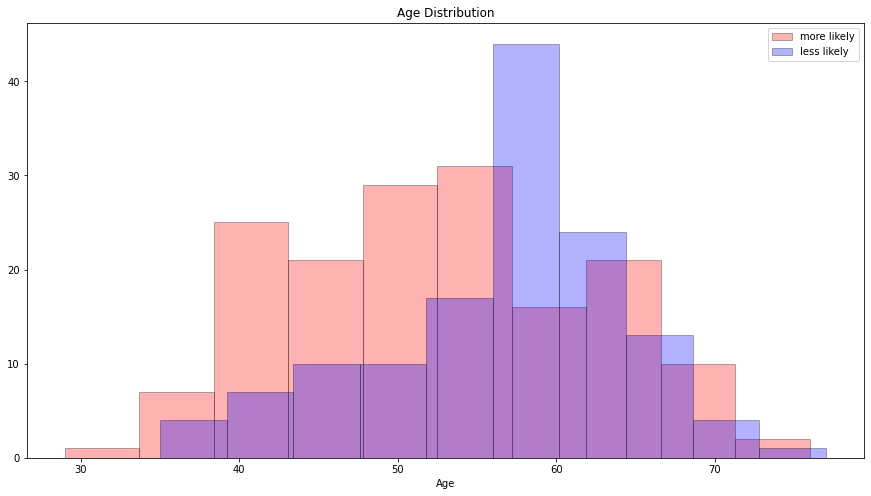

In [482]:
fig , ax = plt.subplots(figsize=(15,8))
df[df.output==1]["age"].hist(ax=ax, color='red', edgecolor='black', alpha=.3, bins=10, label="more likely")
df[df.output==0]["age"].hist(ax=ax, color='blue', edgecolor='black', alpha=.3, bins=10, label="less likely")
plt.xlabel("Age")
plt.title("Age Distribution");
plt.grid(False)
plt.legend()
plt.show()

### Outcomes based on categorical data columns

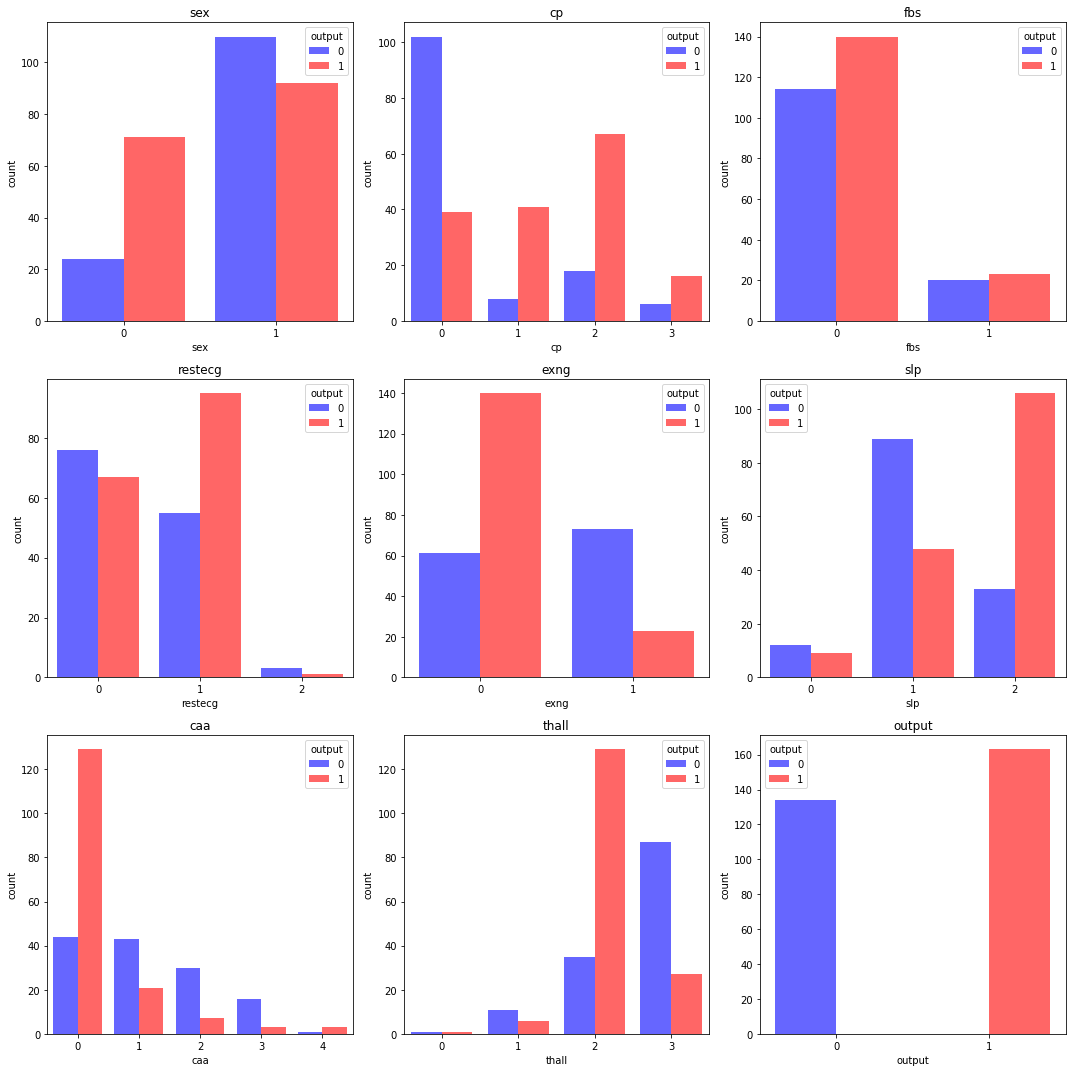

In [483]:
categorical_list = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "output"]
df_categorical = df.loc[:, categorical_list]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

colors = ["blue", "red"]

for i, ax in enumerate(axes.ravel()):
    if i < len(categorical_list):
        sns.countplot(x=categorical_list[i], data=df_categorical, hue="output", alpha=.6, palette=colors, saturation=True, ax=ax)
        ax.set_title(categorical_list[i])
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

### Numerical Columns Pair Plots

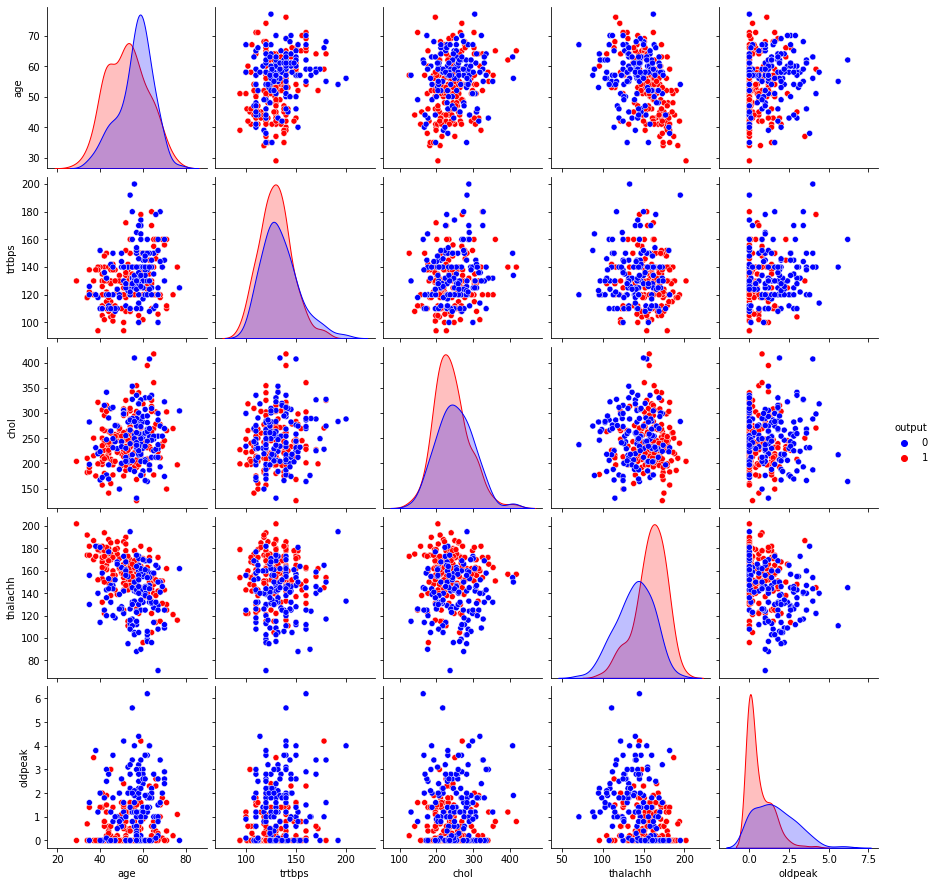

In [484]:
colors = ["blue", "red"]
numerical_list = ["age", "trtbps", "chol", "thalachh", "oldpeak", "output"]
df_numerical = df.loc[:, numerical_list]
sns.pairplot(df_numerical, hue = "output", diag_kind = "kde", palette = colors)
plt.show()

### Data Standardization

In [485]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[numerical_list[:-1]])
pd.DataFrame(scaled_array).describe().T

,count,mean,std,min,25%,50%,75%,max
0,297.0,-2.384924e-16,1.001688,-2.805414,-0.810503,0.076125,0.741095,2.514350
1,297.0,-8.818236e-16,1.001688,-2.136994,-0.654746,-0.084651,0.485445,3.906017
2,297.0,-1.250403e-16,1.001688,-2.450109,-0.702997,-0.106924,0.591921,3.531180
3,297.0,3.498885e-16,1.001688,-3.446064,-0.686765,0.145405,0.714784,2.291526
4,297.0,-2.687712e-16,1.001688,-0.899113,-0.899113,-0.212644,0.473826,4.421025


### Numerical Categories (Yes vs No) Heart Attack Distribution

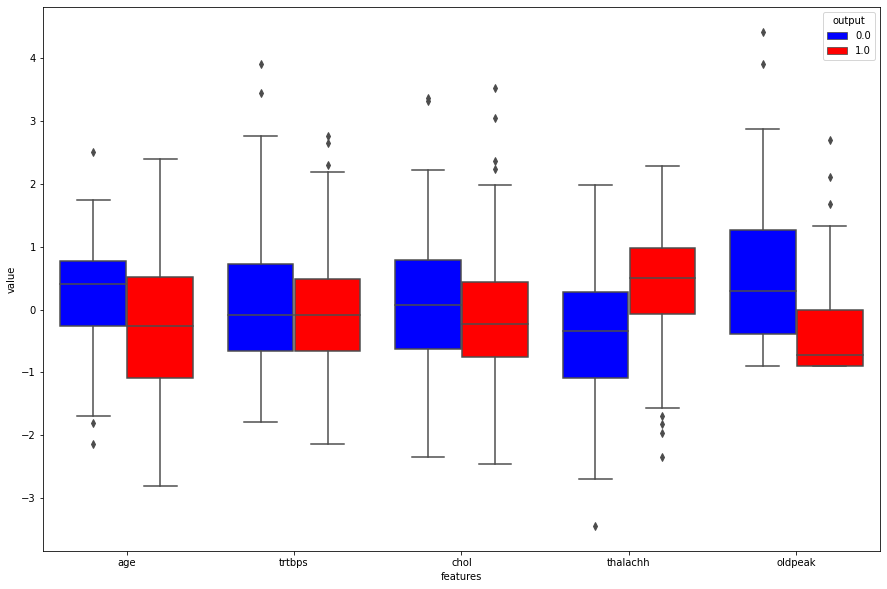

In [486]:
df_dummy = pd.DataFrame(scaled_array, columns = numerical_list[:-1])
df_dummy = pd.concat([df_dummy, df.loc[:, "output"]], axis = 1)
df_melted = pd.melt(df_dummy, id_vars = "output", var_name = "features", value_name = "value")
colors = ["blue", "red"]
plt.figure(figsize = (15, 10))
sns.boxplot(x = "features", y = "value", hue = "output", data = df_melted, saturation = 1, palette = colors)
plt.show()

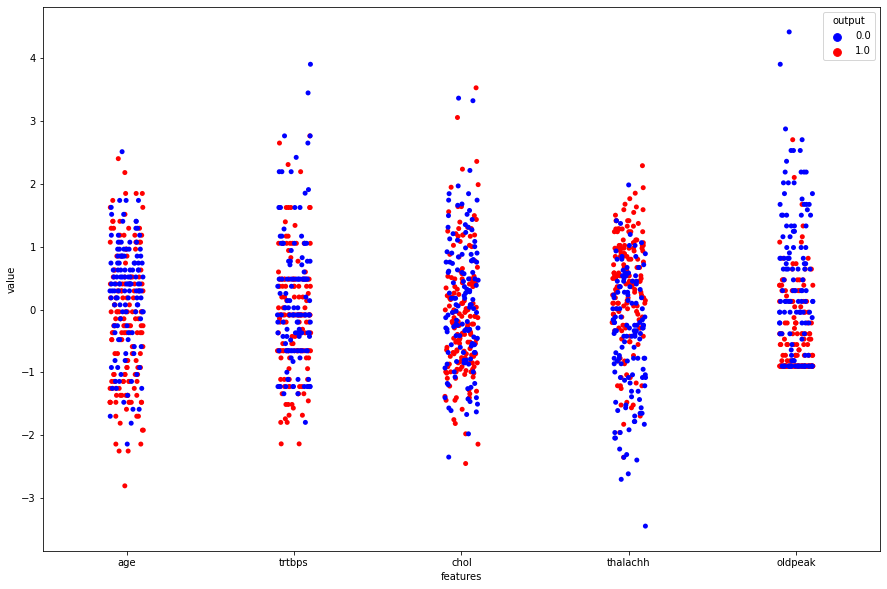

In [487]:
colors = ["blue", "red"]
plt.figure(figsize = (15, 10))
sns.stripplot(x = "features", y = "value", hue = "output", data = df_melted, size=5, palette = colors)
plt.show()

### Chest Pain Type Distribution

In [488]:
ChestPainType = df['cp'].value_counts()
ChestPainType

0    141
2     85
1     49
3     22
Name: cp, dtype: int64

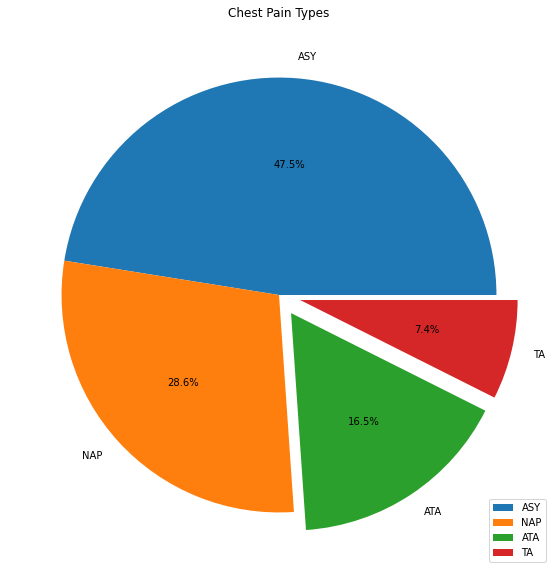

In [489]:
plt.figure(figsize=(15, 10))
plt.pie(ChestPainType, labels=['ASY', 'NAP', 'ATA', 'TA'],
                        autopct='%1.1f%%', shadow=False,
                        explode=[0.0, 0.0, 0.1, 0.1])
plt.title('Chest Pain Types')
plt.legend()
plt.show()

### Resting ECG Distribution

In [490]:
# RestingECG
RestingECG = df['restecg'].value_counts()
RestingECG

1    150
0    143
2      4
Name: restecg, dtype: int64

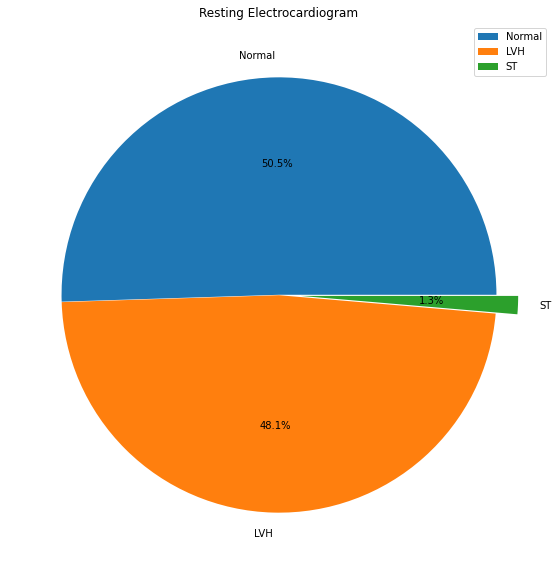

In [491]:
# Show resting electrocardiogram
plt.figure(figsize=(15, 10))
plt.pie(RestingECG, labels=['Normal', 'LVH', 'ST'],
                    autopct='%1.1f%%', shadow=False,
                    explode=[0.001, 0.001, 0.1])
plt.title('Resting Electrocardiogram')
plt.legend()
plt.show()

### Heart Attack vs Age

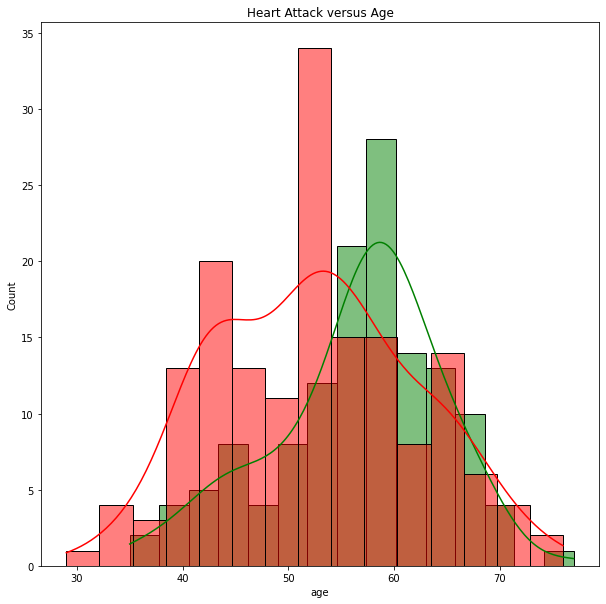

In [532]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['output'] == 0]["age"], color='green',kde=True, bins=15) 
sns.histplot(df[df['output'] == 1]["age"], color='red',kde=True, bins=15)
plt.title('Heart Attack versus Age')
plt.show()

### Blood Pressure

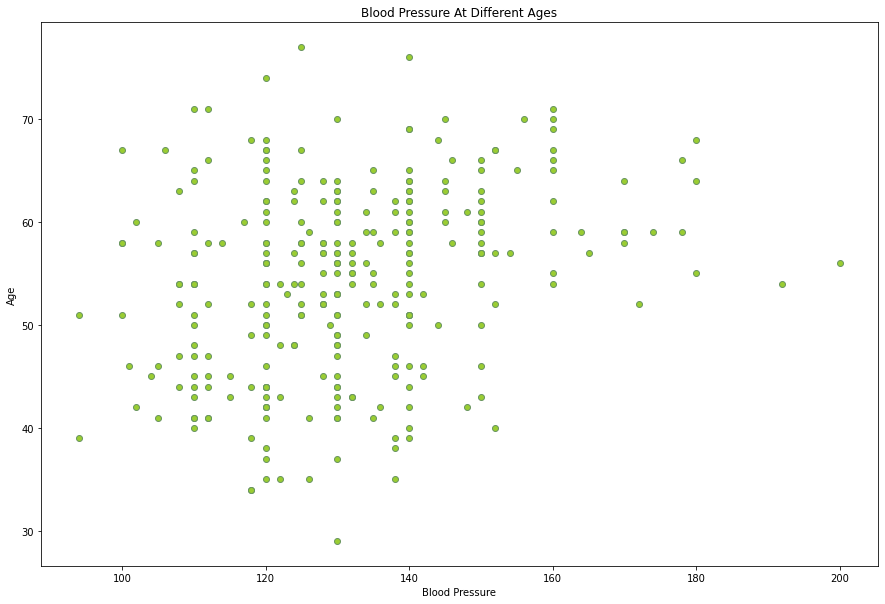

In [492]:
plt.figure(figsize=(15, 10))
plt.scatter(df['trtbps'], df['age'], color='yellowgreen', edgecolor="#6A9662")
plt.title('Blood Pressure At Different Ages')
plt.xlabel('Blood Pressure')
plt.ylabel('Age')
plt.show()

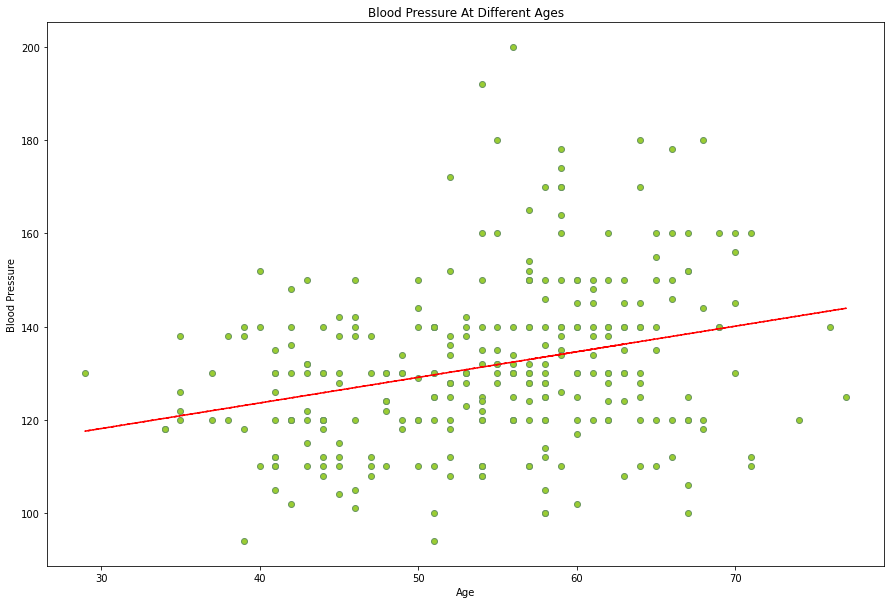

In [493]:
plt.figure(figsize=(15, 10))
plt.scatter(df['age'], df['trtbps'], color='yellowgreen', edgecolor="#6A9662")
plt.title('Blood Pressure At Different Ages')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')

# Fit a polynomial regression line
z = np.polyfit(df['age'], df['trtbps'], 1)
p = np.poly1d(z)
plt.plot(df['age'], p(df['age']), "r--")

plt.show()

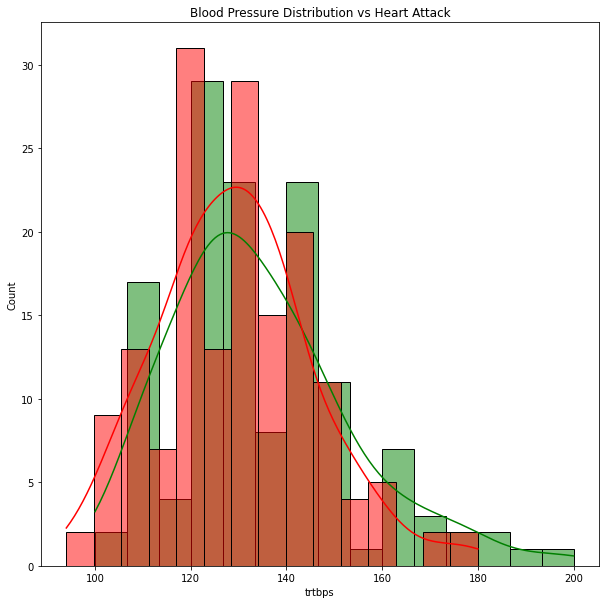

In [541]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['output'] == 0]['trtbps'], color='green',kde=True, bins=15) 
sns.histplot(df[df['output'] == 1]['trtbps'], color='red',kde=True, bins=15)
plt.title('Blood Pressure Distribution vs Heart Attack')
plt.show()

### Cholestorol

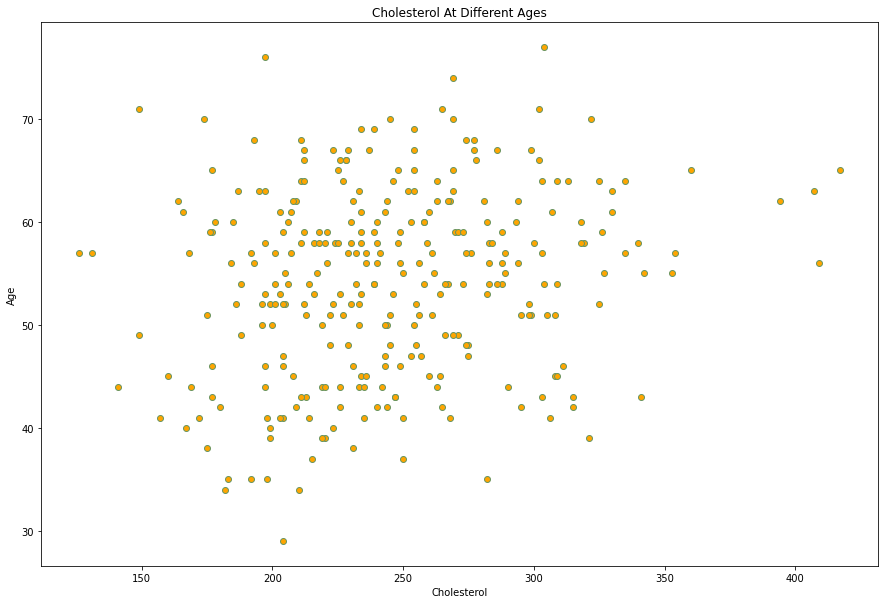

In [494]:
plt.figure(figsize=(15, 10))
plt.scatter(df['chol'], df['age'], color='orange', edgecolor="#6A9662")
plt.title('Cholesterol At Different Ages')
plt.xlabel('Cholesterol')
plt.ylabel('Age')
plt.show()

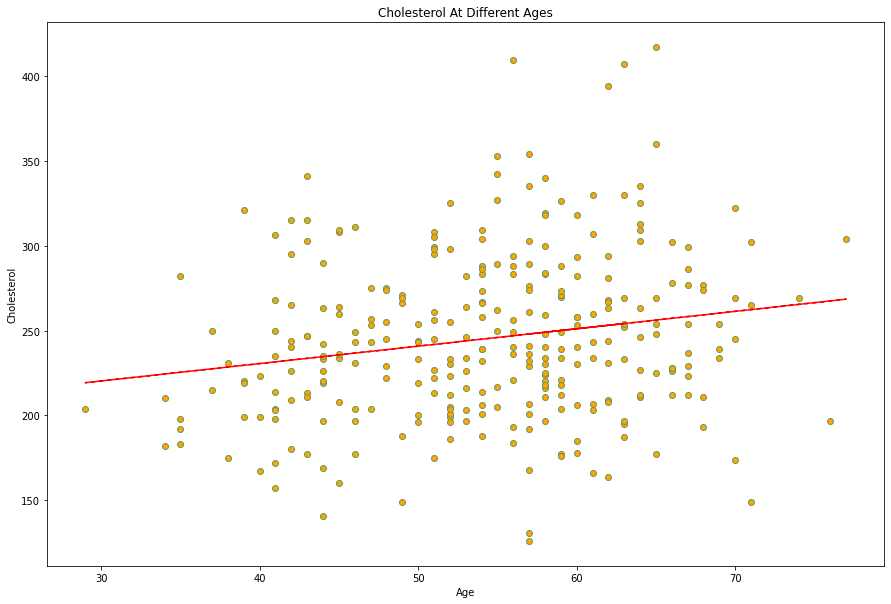

In [495]:
plt.figure(figsize=(15, 10))
plt.scatter(df['age'], df['chol'], color='orange', edgecolor="#6A9662")
plt.title('Cholesterol At Different Ages')
plt.xlabel('Age')
plt.ylabel('Cholesterol')

# Fit a polynomial regression line
z = np.polyfit(df['age'], df['chol'], 1)
p = np.poly1d(z)
plt.plot(df['age'], p(df['age']), "r--")

plt.show()

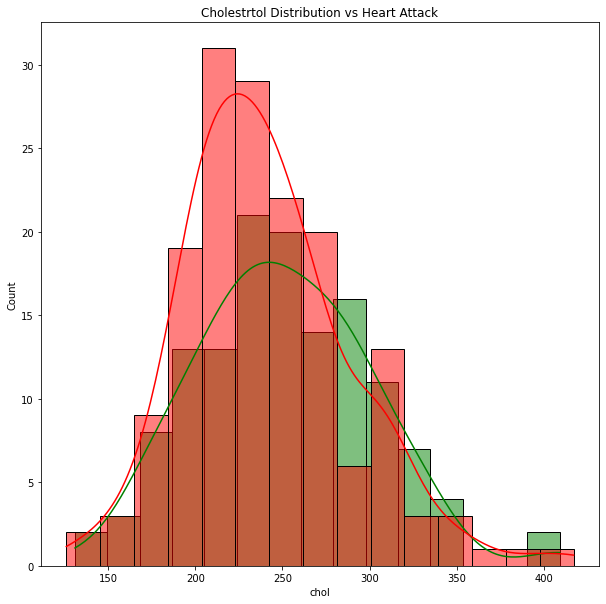

In [540]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['output'] == 0]["chol"], color='green',kde=True, bins=15) 
sns.histplot(df[df['output'] == 1]["chol"], color='red',kde=True, bins=15)
plt.title('Cholestrtol Distribution vs Heart Attack')
plt.show()

### Maximum Heart Rate

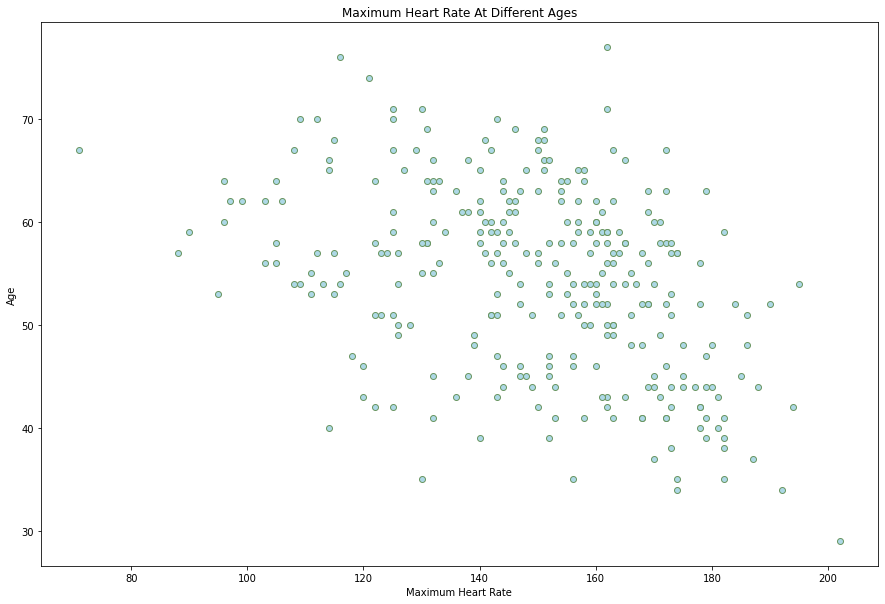

In [496]:
plt.figure(figsize=(15, 10))
plt.scatter(df['thalachh'], df['age'], color='lightblue', edgecolor="#6A9662")
plt.title('Maximum Heart Rate At Different Ages')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Age')
plt.show()

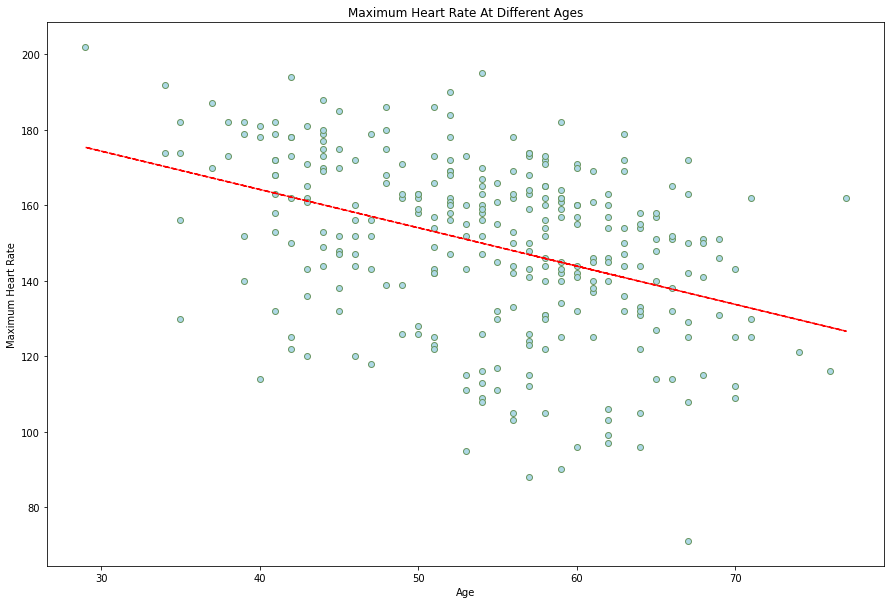

In [497]:
plt.figure(figsize=(15, 10))
plt.scatter(df['age'], df['thalachh'], color='lightblue', edgecolor="#6A9662")
plt.title('Maximum Heart Rate At Different Ages')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

# Fit a polynomial regression line
z = np.polyfit(df['age'], df['thalachh'], 1)
p = np.poly1d(z)
plt.plot(df['age'], p(df['age']), "r--")

plt.show()

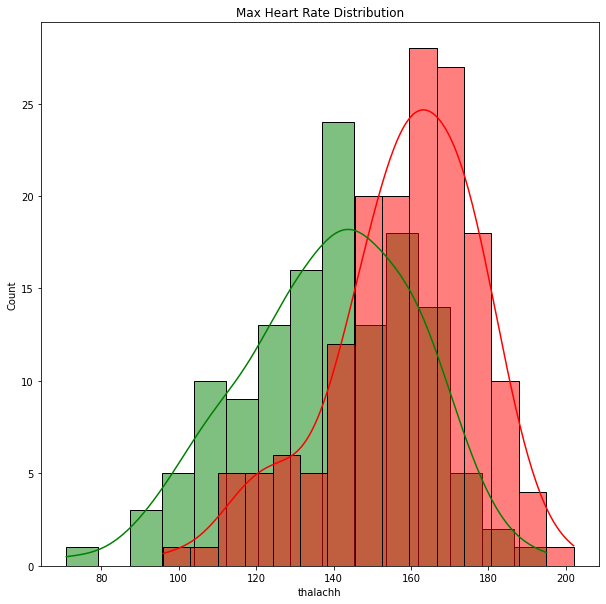

In [537]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['output'] == 0]["thalachh"], color='green',kde=True, bins=15) 
sns.histplot(df[df['output'] == 1]["thalachh"], color='red',kde=True, bins=15)
plt.title('Max Heart Rate Distribution vs Heart Attack')
plt.show()

## Machine Learning Models

### Prepare Data for ML Training

In [498]:
X = df.drop('output', axis=1)
y = df['output']

selector = SelectKBest(chi2)
X_new = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25)

# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [499]:
print('Shape for training data', X_train.shape, y_train.shape)
print('Shape for testing data', X_test.shape, y_test.shape)

Shape for training data (222, 10) (222,)
Shape for testing data (75, 10) (75,)


### Logistic Regression

In [500]:
model = LogisticRegression(max_iter=1000000).fit(X_train, y_train)

print("Train clf score:",model.score(X_train, y_train))
print("Test clf score:",model.score(X_test, y_test))

Train clf score: 0.8378378378378378
Test clf score: 0.8666666666666667


The accuracy of Logistic Regression is :  86.66666666666667 %

Confusion Matrix : 
 [[27  7]
 [ 3 38]]


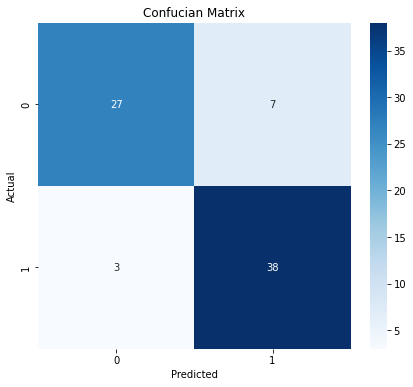

In [501]:
predicted=model.predict(X_test)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%\n")

conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
sns.heatmap(conf, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.gcf().set_size_inches(7,6)
plt.title("Confucian Matrix")
plt.show()

### Gaussian Naive Bayes

The accuracy of Gaussian Naive Bayes model is :  74.66666666666667 %
Confusion Matrix : 
 [[21 13]
 [ 6 35]]


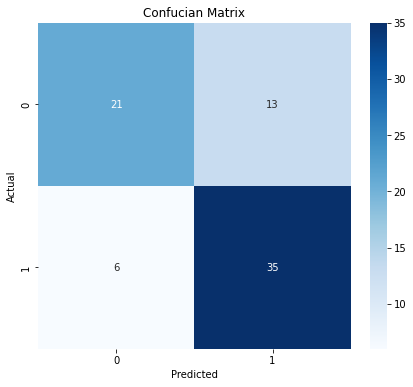

In [502]:
model = GaussianNB()
model.fit(X_train, y_train)
predicted = model.predict(x_test)
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
sns.heatmap(conf, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.gcf().set_size_inches(7,6)
plt.title("Confucian Matrix")
plt.show()

### Bernoulli Naive Bayes

The accuracy of Gaussian Naive Bayes model is :  88.0 %
Confusion Matrix : 
 [[28  6]
 [ 3 38]]


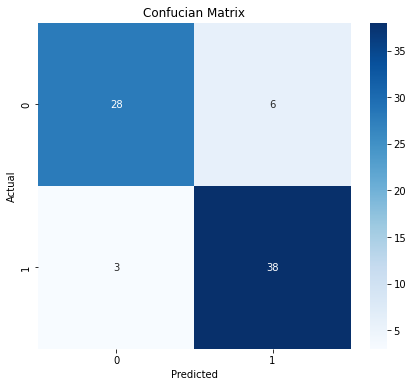

In [503]:
model = BernoulliNB()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")

conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
sns.heatmap(conf, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.gcf().set_size_inches(7,6)
plt.title("Confucian Matrix")
plt.show()

### Random Forrest Regressor

In [504]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Random Forest is :  80.0 %


### Support Vecrtor Machine

The accuracy of SVM is :  85.33333333333334 %
Confusion Matrix : 
 [[27  7]
 [ 4 37]]


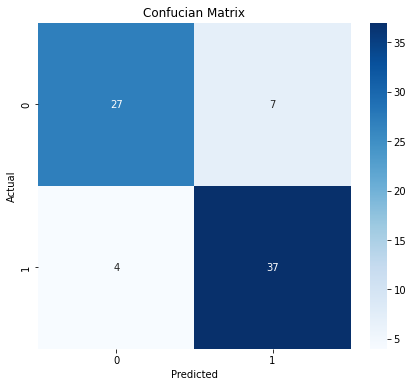

In [505]:
model = SVC()
model.fit(x_train, y_train)
  
predicted = model.predict(x_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")

conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
sns.heatmap(conf, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.gcf().set_size_inches(7,6)
plt.title("Confucian Matrix")
plt.show()

### K Nearest Neighbors

The accuracy of KNN is :  74.66666666666667 %
Confusion Matrix : 
 [[26  8]
 [11 30]]


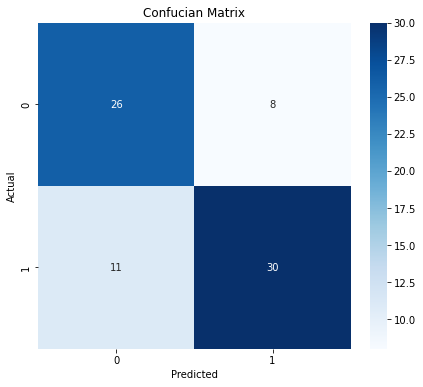

In [506]:
model = KNeighborsClassifier(n_neighbors = 1)  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")  
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)

sns.heatmap(conf, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.gcf().set_size_inches(7,6)
plt.title("Confucian Matrix")
plt.show()

### KNN Optimization

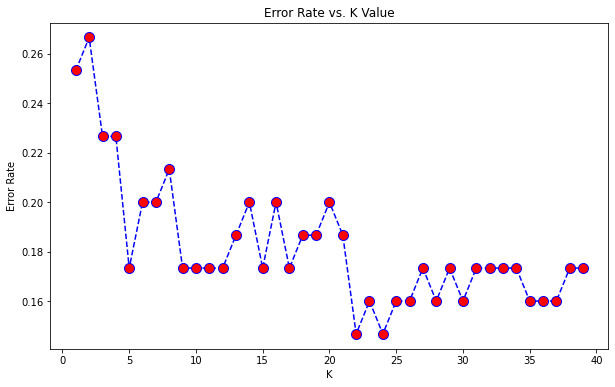

In [507]:
error_rate = []
  
for i in range(1, 40):
      
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
  
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

### KNN with 7 Neighbors

The accuracy of KNN is :  80.0 %

Confusion Matrix :
[[27  7]
 [ 8 33]]


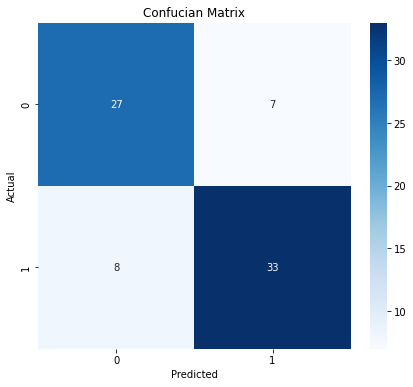

In [508]:
model = KNeighborsClassifier(n_neighbors = 7)
  
model.fit(x_train, y_train)
predicted = model.predict(x_test)

print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%\n")

print('Confusion Matrix :')
conf = confusion_matrix(y_test, predicted)
print(conf)
sns.heatmap(conf, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.gcf().set_size_inches(7,6)
plt.title("Confucian Matrix")
plt.show()

### X Gradient Boosting

The accuracy of X Gradient Boosting is :  81.33333333333333 %

Confusion Matrix :
[[26  8]
 [ 6 35]]


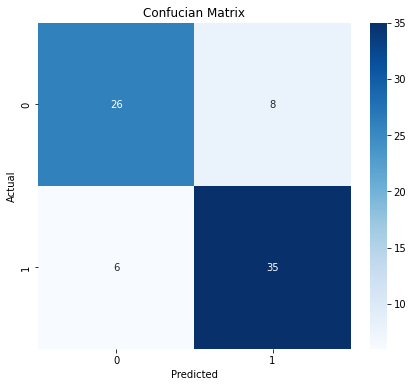

In [514]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)
   
predicted = model.predict(x_test)
   
conf = confusion_matrix(y_test, predicted)

print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%\n")
print('Confusion Matrix :')
print(conf)
sns.heatmap(conf, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.gcf().set_size_inches(7,6)
plt.title("Confucian Matrix")
plt.show()